In [1]:
# IMPORTS

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances

import matplotlib.patches as patches

# EXAMPLE: GRADES AND REGRESSION


You are a physics professor and you are conducting the Physics Midterm. You had the students report the amount of hours spent studying. So after marking the midterm you now have a dataset that consists of time spent studying, and the final score on the midterm out of 100.

We will conduct a regression analysis to quantify the relation between studying, and the final score. What do we initially expect the number to look like?

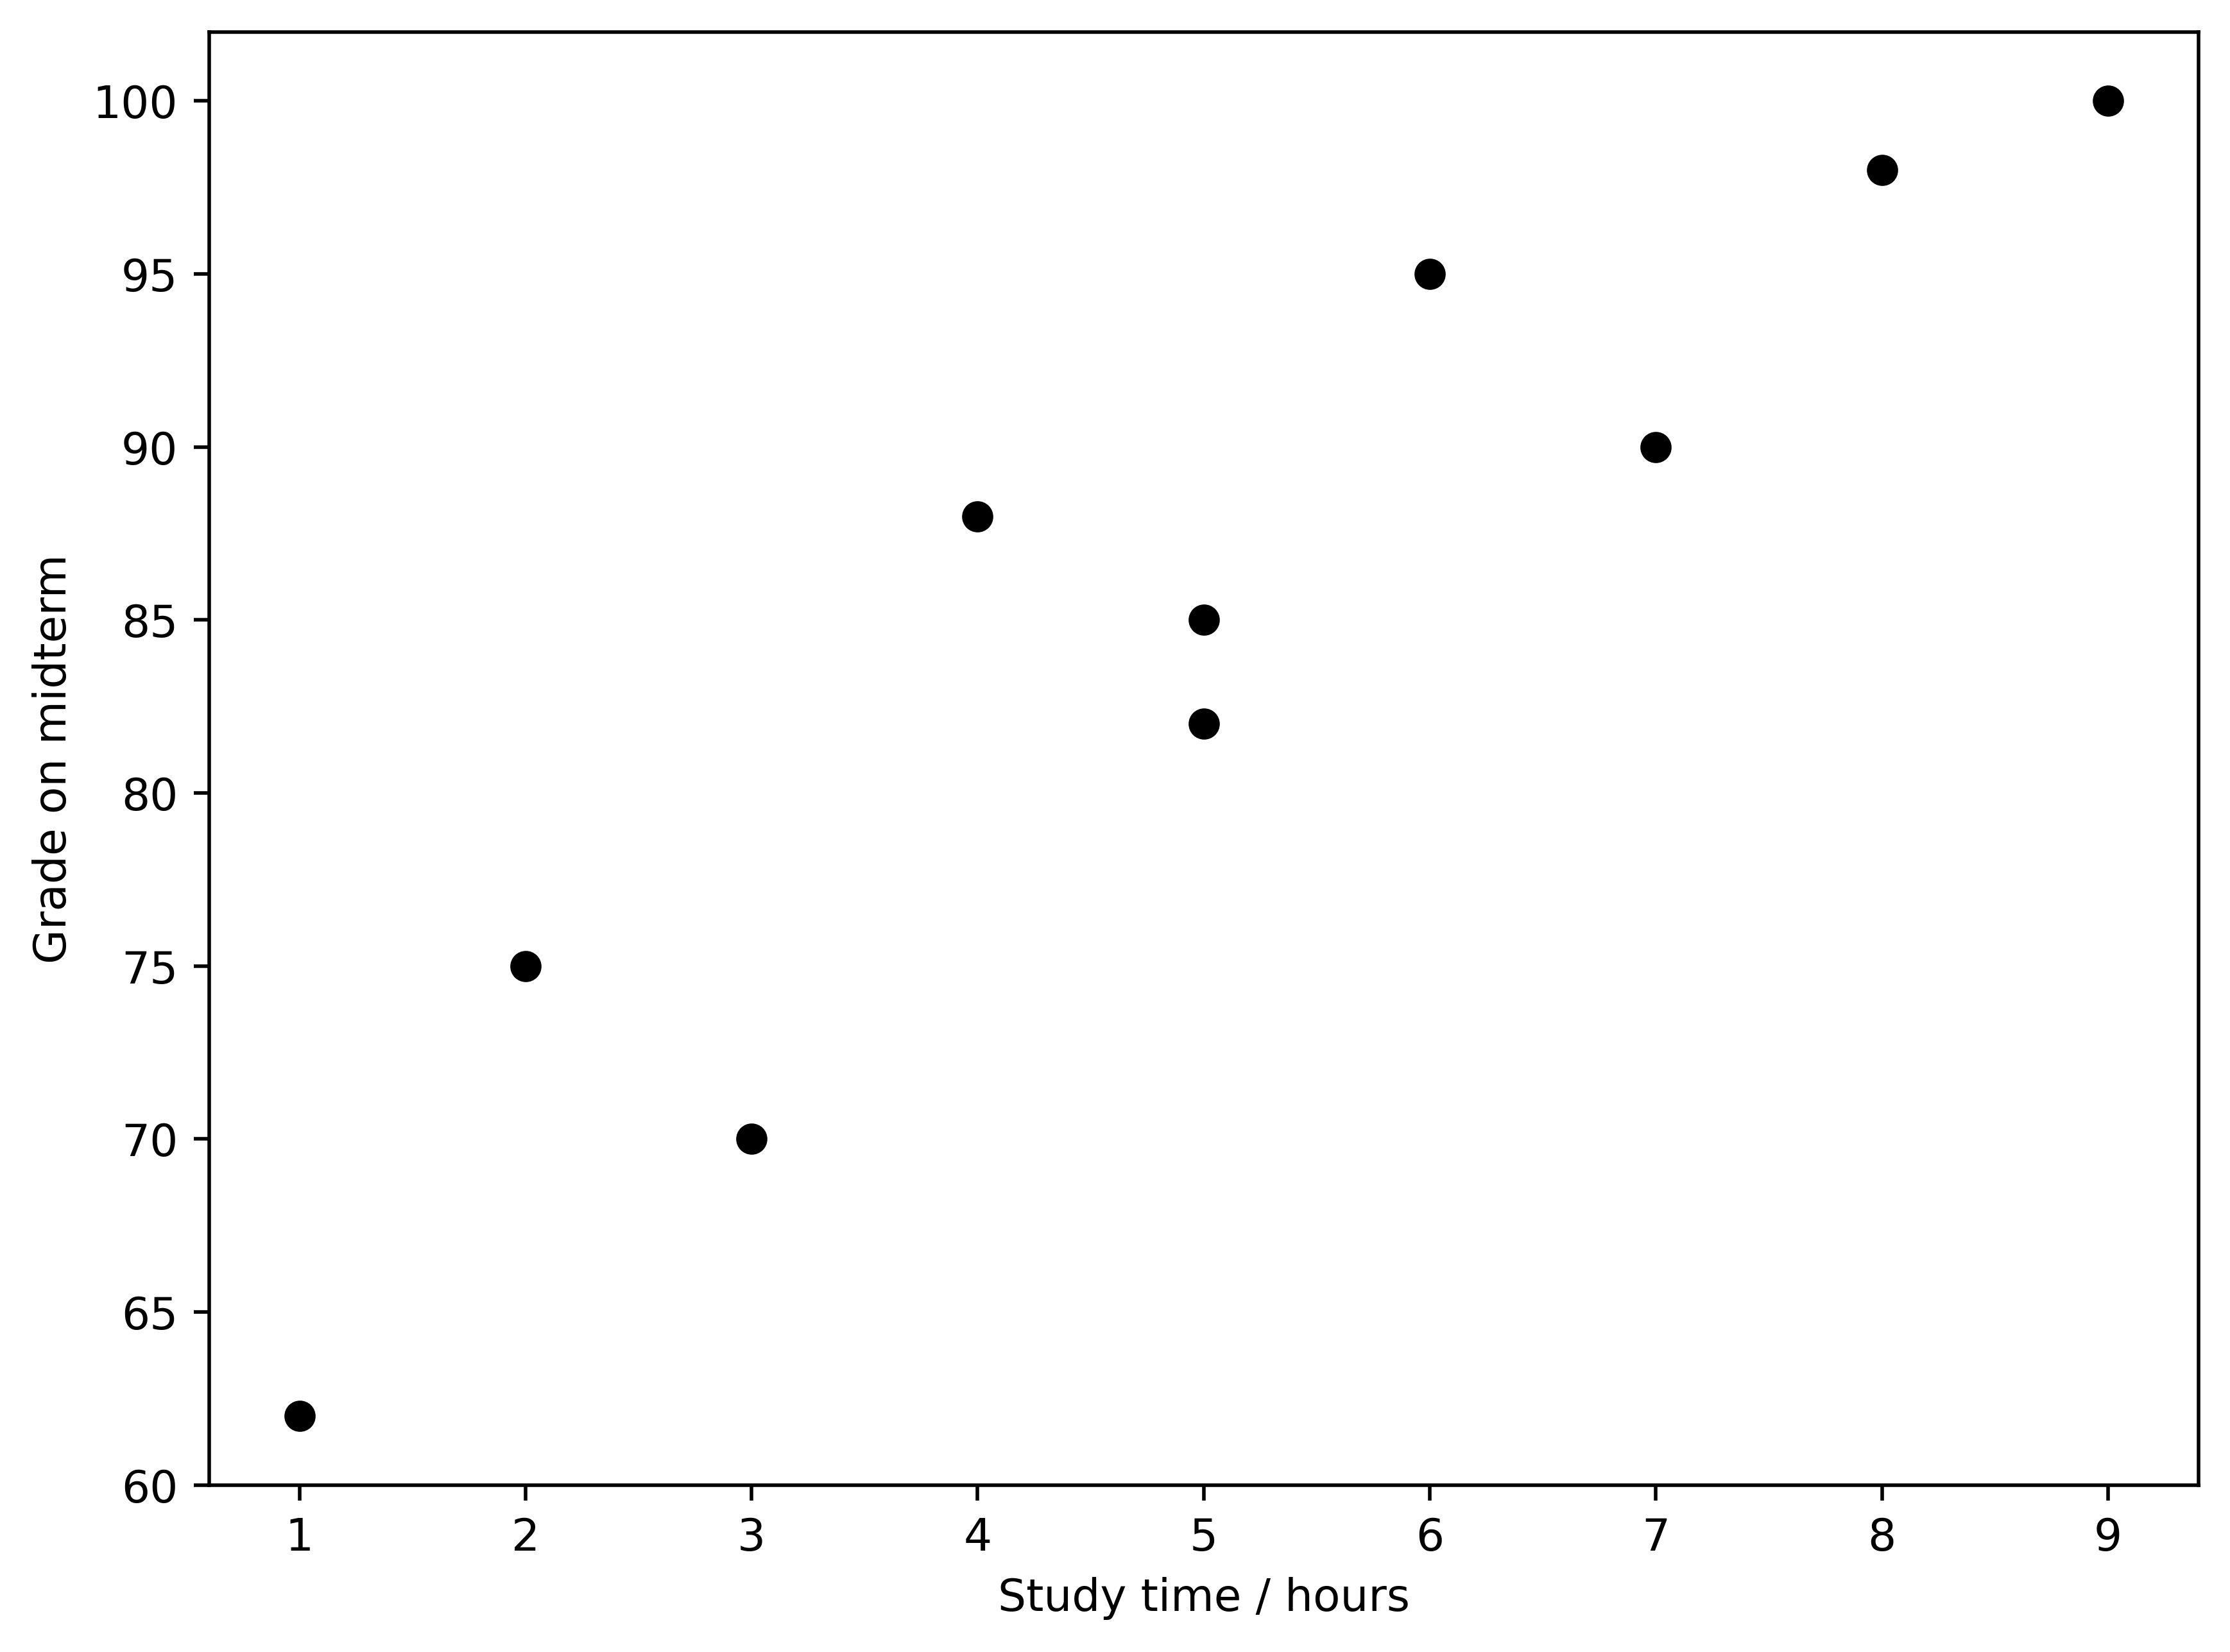

In [2]:
'''
let's say there is a physics midterm coming up. the prof asked the students to report how long they studied
for the test.

so we have data for time spent studying, and final grade out of 100. let's analyze this data
'''

study_time = [2, 4, 6, 5, 8, 3, 1, 7, 9, 5]  # Hours spent studying
final_grades = [75, 88, 95, 82, 98, 70, 62, 90, 100, 85]  # Grades (out of 100)

plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed
plt.plot(study_time,final_grades,'ko') # specifying 'ko' tells plt to plot black dots
plt.xlabel('Study time / hours')
plt.ylabel('Grade on midterm')
plt.ylim([60,102])
plt.show()

In [3]:
# our function to manually do linear regression on the grades

def linear_regression_grades(study_time, final_grades):
    """
    Performs linear regression on the given study time and final grade data.

    Args:
        study_time: A list of study time values (in hours).
        final_grades: A list of final grade values (out of 100).

    Returns:
        A tuple containing the slope (m) and intercept (b) of the linear regression line.
    """

    import numpy as np
    
    # Convert data to NumPy arrays for efficient calculations
    study_time = np.array(study_time)
    final_grades = np.array(final_grades)

    # Calculate mean values
    mean_study_time = np.mean(study_time)
    mean_final_grade = np.mean(final_grades)

    # Calculate numerator and denominator for slope (m)
    numerator = np.sum((study_time - mean_study_time) * (final_grades - mean_final_grade))
    denominator = np.sum((study_time - mean_study_time) ** 2)

    # Calculate slope (m)
    m = numerator / denominator

    # Calculate intercept (b)
    b = mean_final_grade - m * mean_study_time

    return m, b

Slope (m): 4.5 Grade points / hour studying
Intercept (b): 62.2


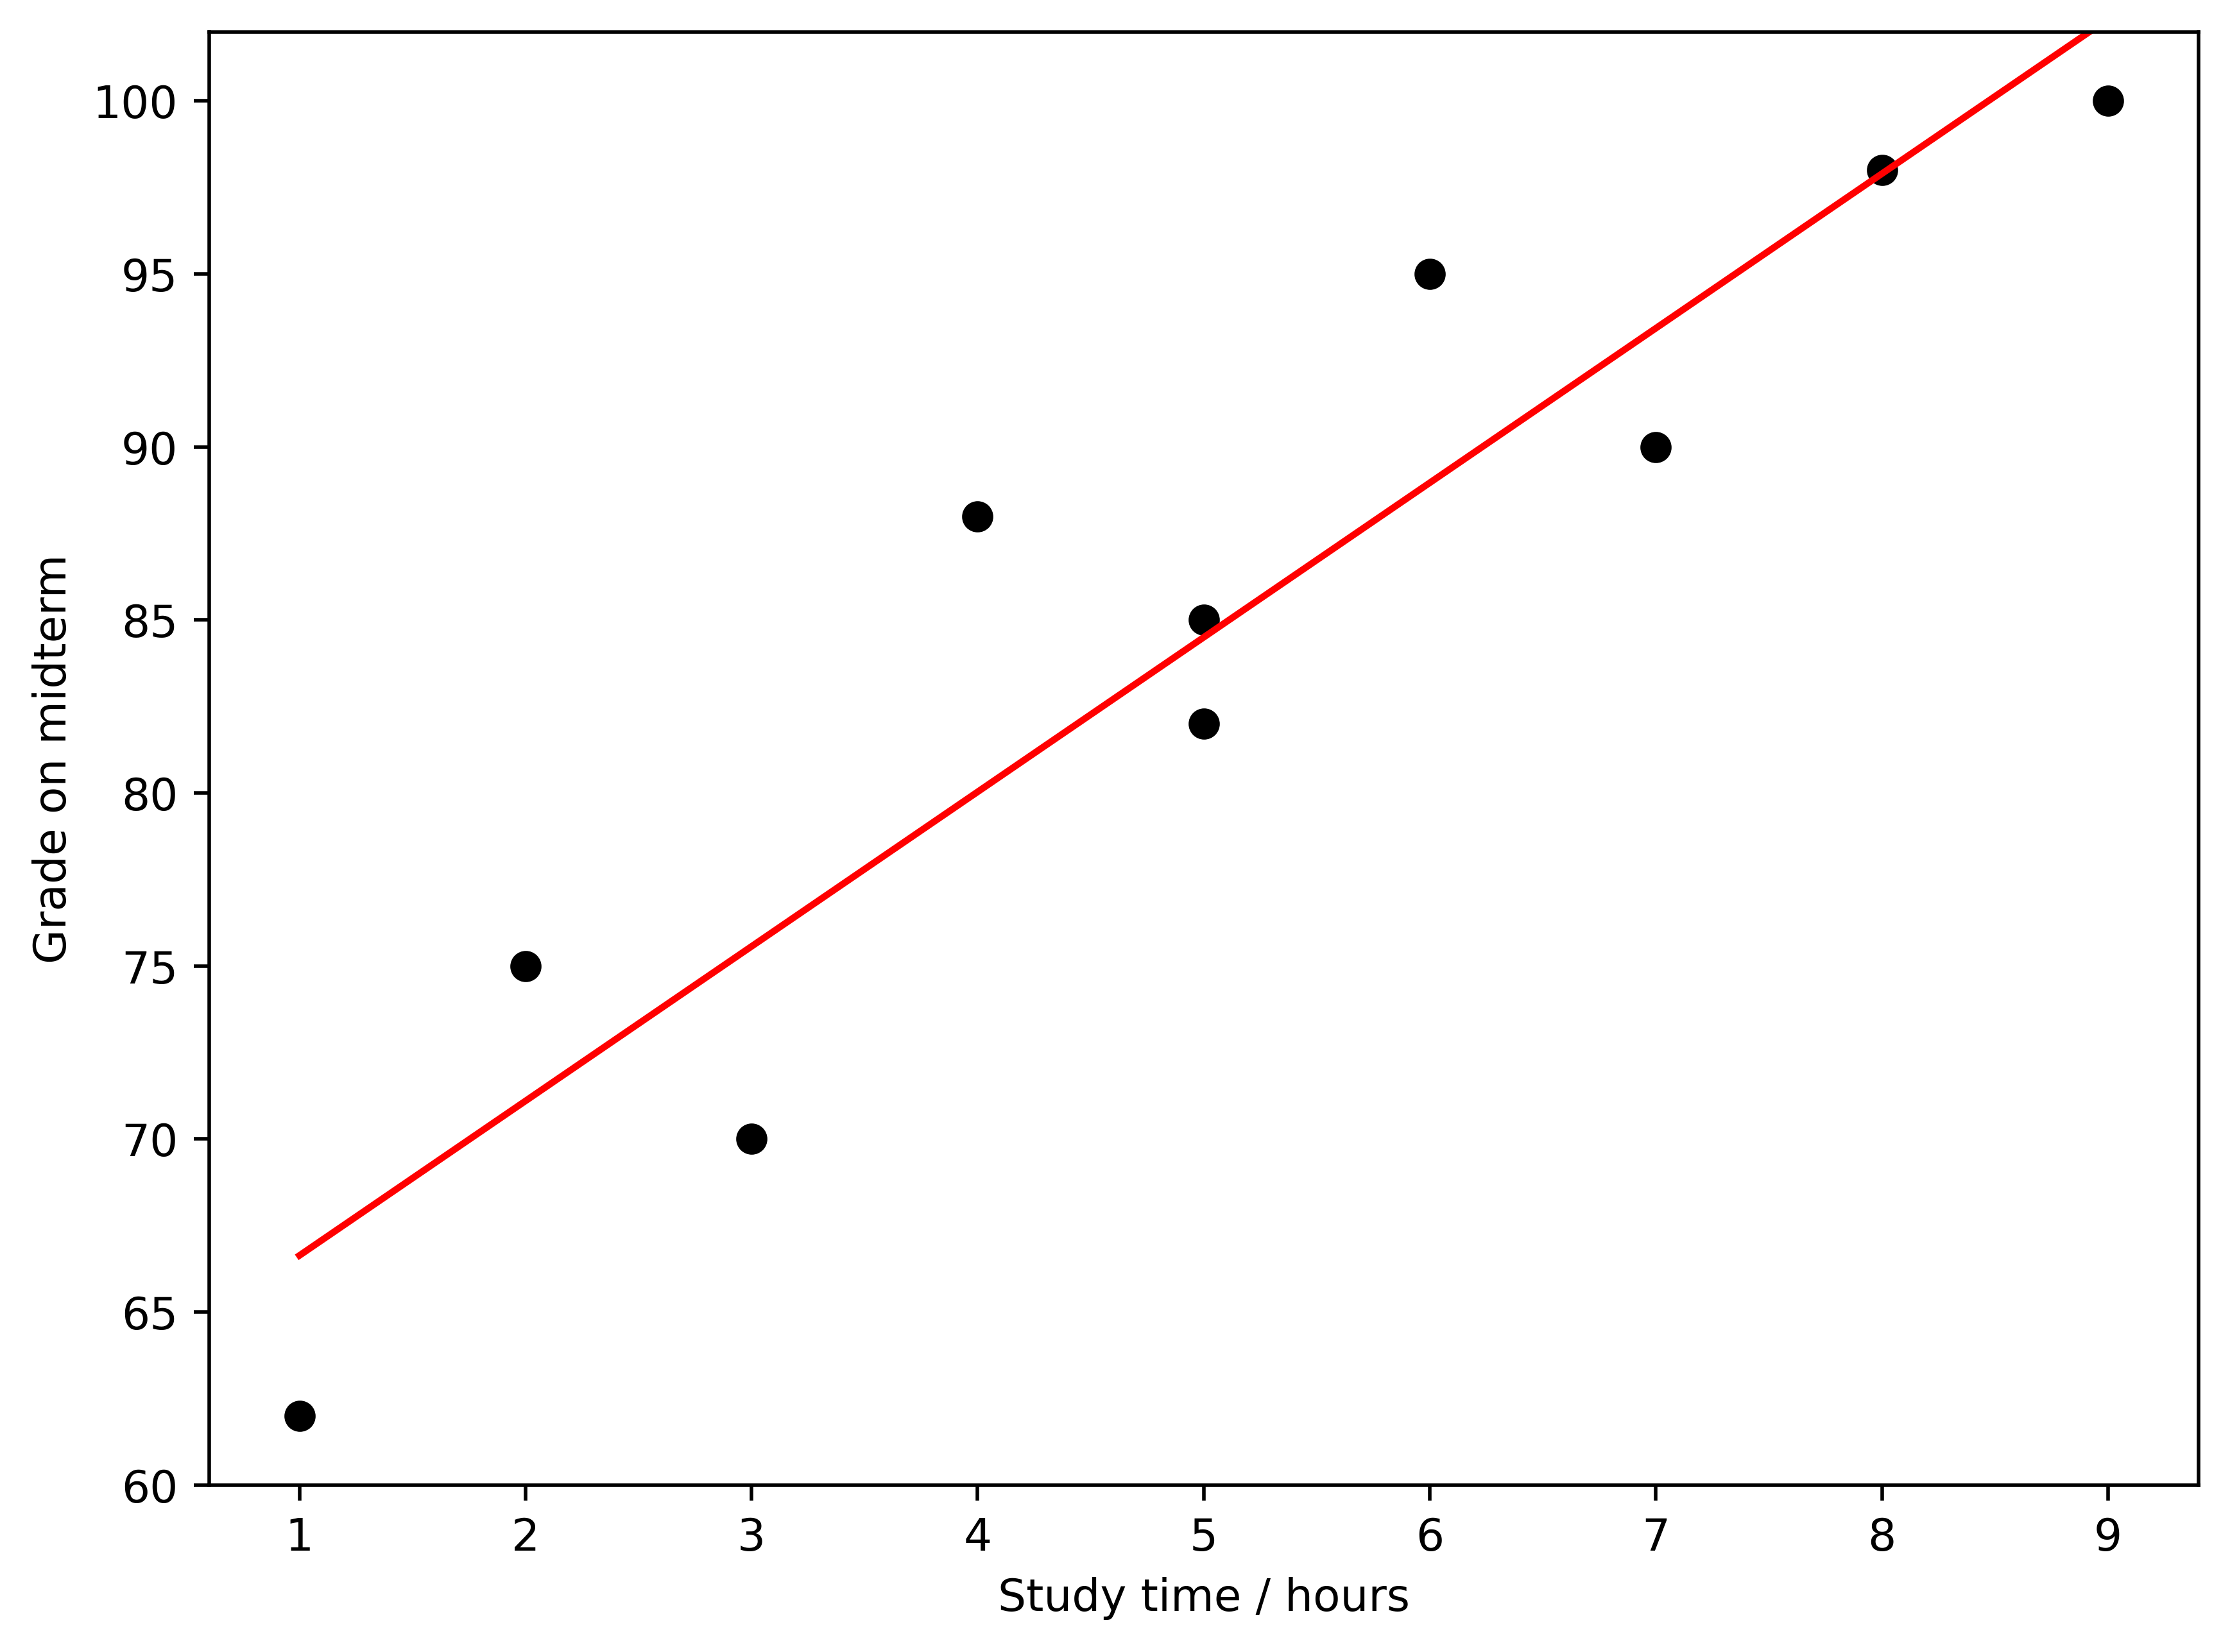

In [4]:
# Perform linear regression
slope, intercept = linear_regression_grades(study_time, final_grades) # get the slope and intercept

# Print the results (slope and intercept)
print("Slope (m):", round(slope,1),'Grade points / hour studying')
print("Intercept (b):", round(intercept,1))

# create arrays to plot this as a straight line
regression_x = np.array([np.min(study_time),np.max(study_time)]) # this just two points, the min and max study time
regression_y = slope * regression_x + intercept # put regression_x into y = m*x + b

plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed
plt.plot(study_time,final_grades,'ko')
plt.plot(regression_x,regression_y,'r-')
plt.xlabel('Study time / hours')
plt.ylabel('Grade on midterm')
plt.ylim([60,102])
plt.show()

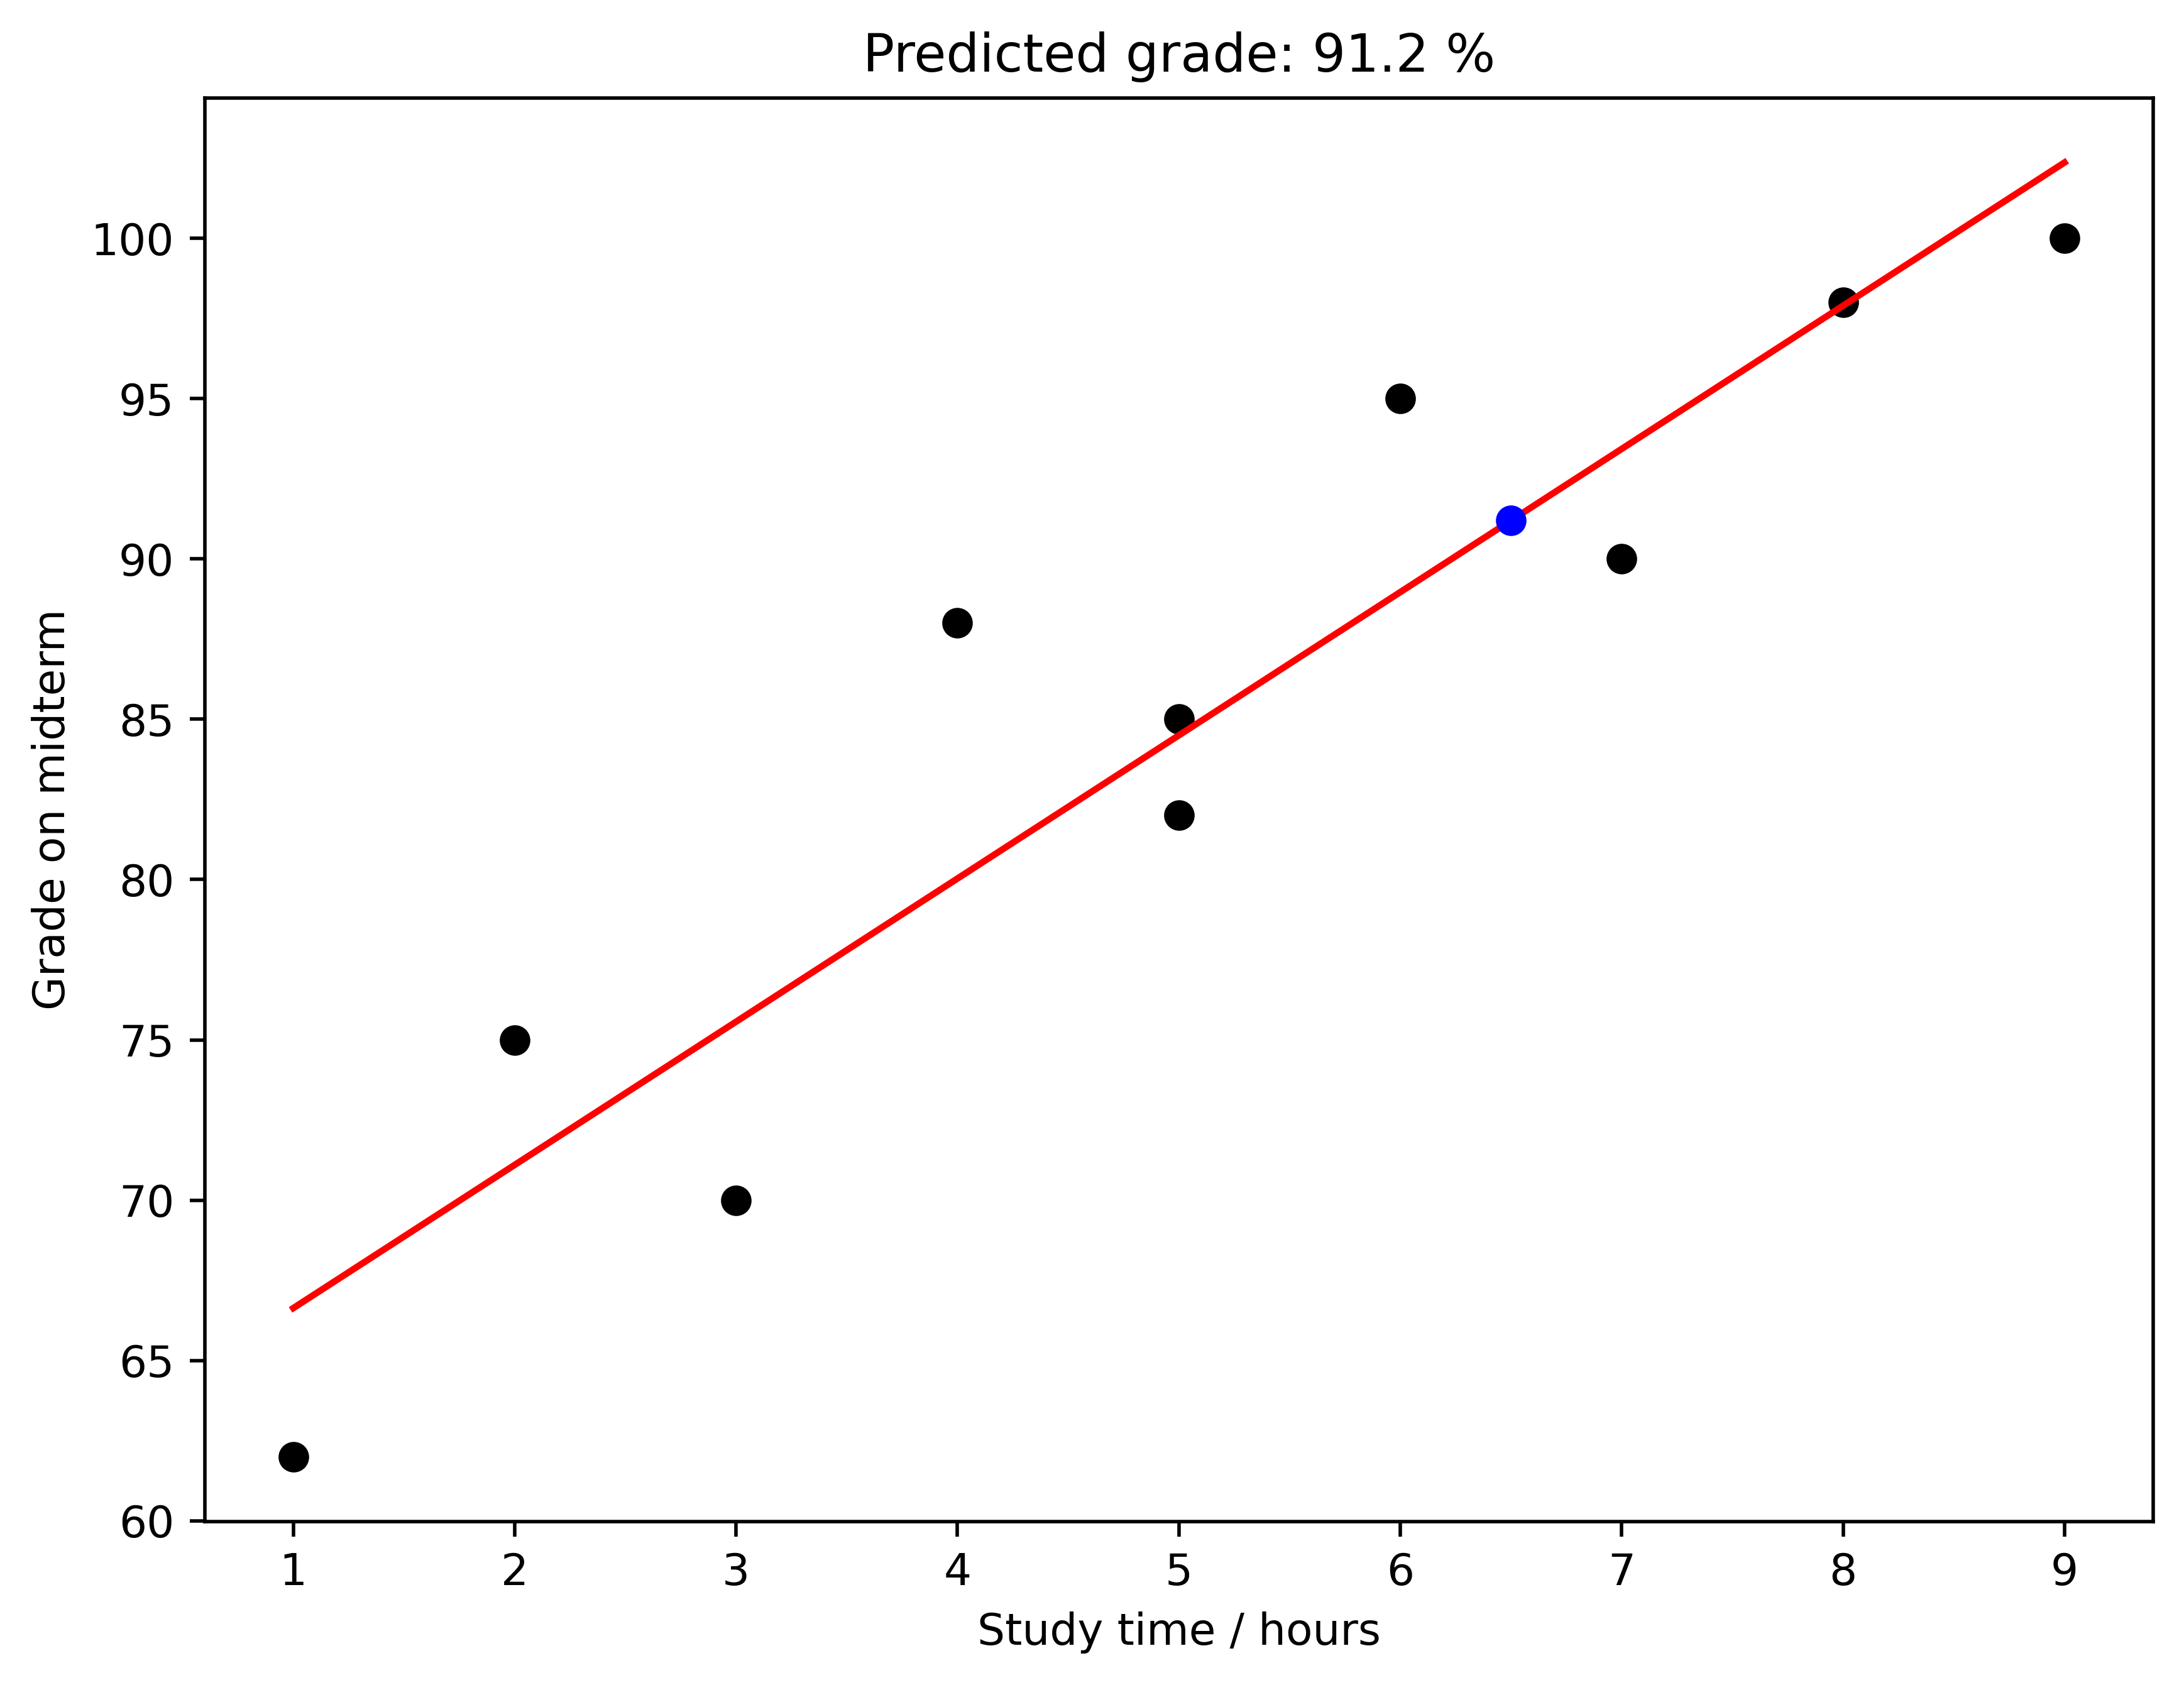

In [5]:
'''
now given this data, let's say a studdent was late and now has to write the midterm
if they spend 6.5 hours studying, what would be predict their grade to be?
'''

# time spent studying, x = 6.5
x_predict = 6.5
y_predict = slope * x_predict + intercept # put x_predict into y = m*x + b

plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed
plt.plot(study_time,final_grades,'ko')
plt.plot(regression_x,regression_y,'r-')
plt.plot(x_predict,y_predict,'bo')
plt.xlabel('Study time / hours')
plt.ylabel('Grade on midterm')
plt.title(f'Predicted grade: {y_predict} %')
plt.show()

In [6]:
'''
now we will do a non-manual version of this regression using scikit-learn
'''

# 1. Import the scikit-learn linear regression function
from sklearn.linear_model import LinearRegression

# 2. Reshape the x variable to be a column vector (this is just a math thing that is needed for this code to work)
study_time_reshaped = np.reshape(study_time, (-1, 1))  # Reshape as a column vector

# print(np.shape(study_time_reshaped),np.shape(study_time)) # if you want to see how the shape changes from a row vector to a column vector

# 3. Create our model object: Create a LinearRegression object
model = LinearRegression()

# 4. Fit the model to the data
model.fit(study_time_reshaped, final_grades)

# 5. Get the slope (regression coefficient) and intercept
slope_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_

# Print the results
print("Slope (m) using scikit-learn:", round(slope_sklearn,1))
print("Intercept (b) using scikit-learn:", round(intercept_sklearn,1))

Slope (m) using scikit-learn: 4.5
Intercept (b) using scikit-learn: 62.2


# EXERCISE: NHL PLAYER SALARIES

You are a NHL player agent and are negotiating new contracts for 4 of your clients.

You have the data for the 200 most expensive players, and the number of goals they scored.

Your clients scored 20, 30, 40, and 50 goals.

Conduct a regression analysis to determine how much you think each of these players should make for next year.

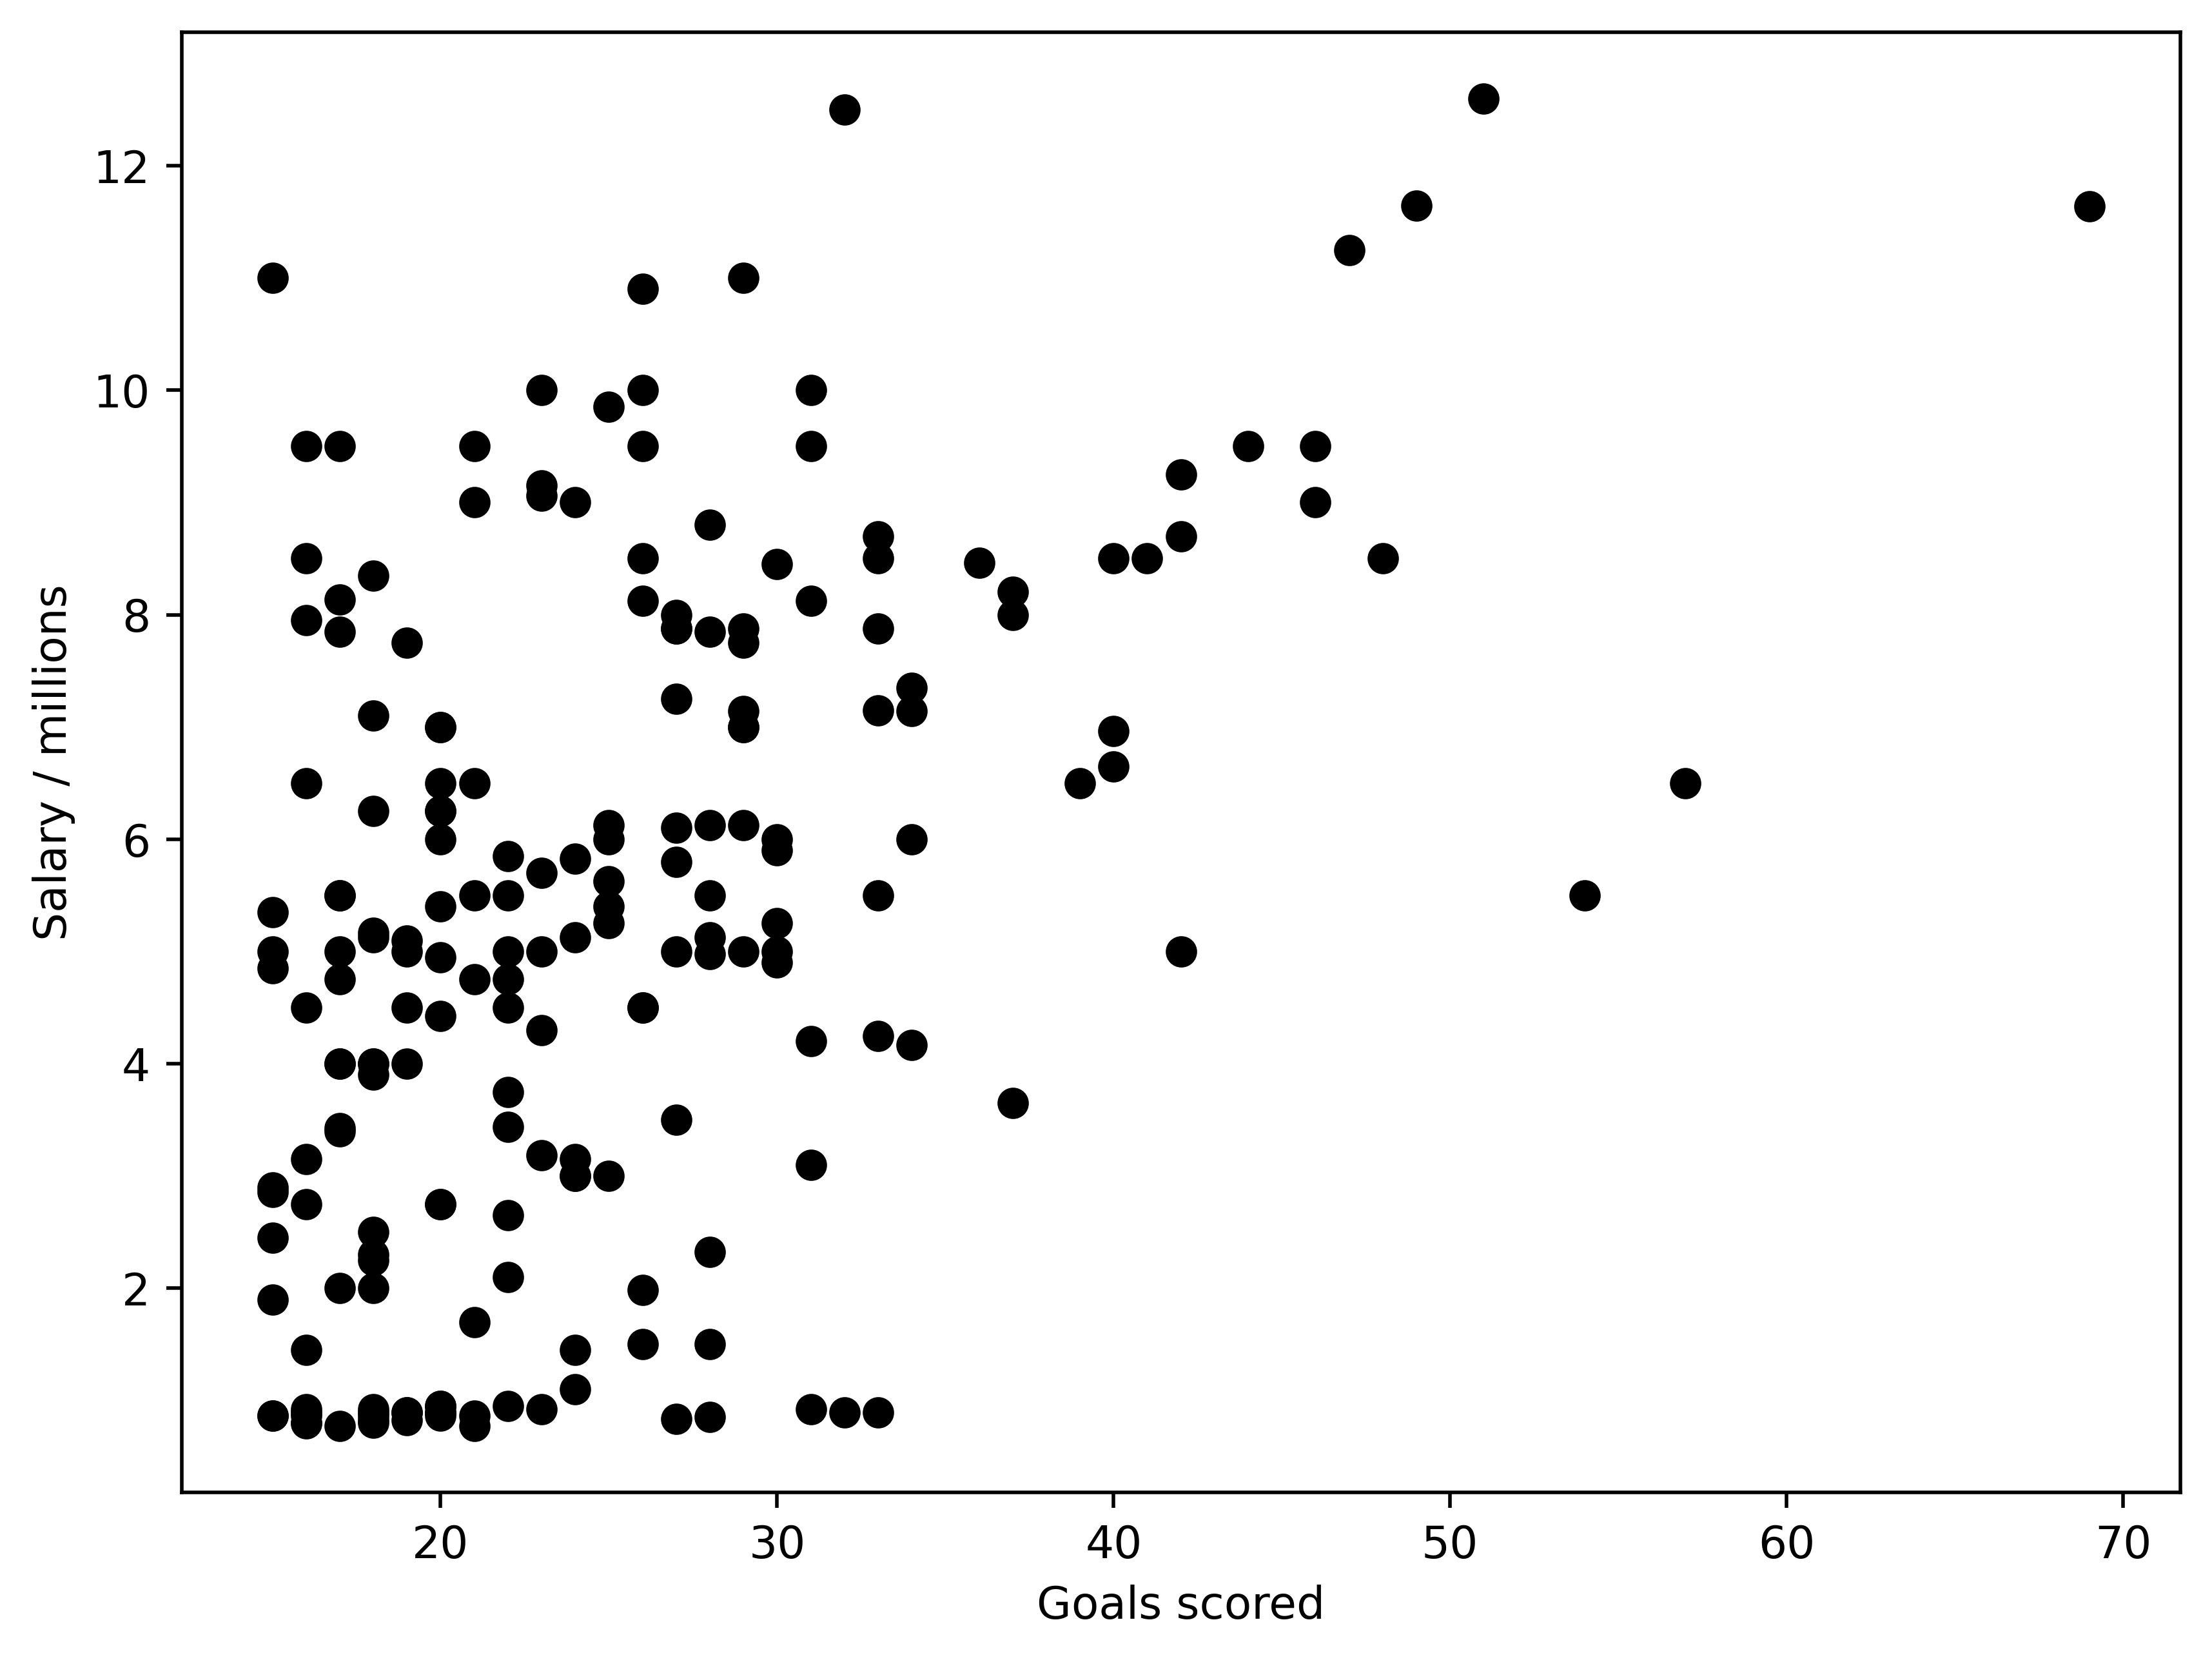

In [7]:
# get data

fn_salary = 'salary_data.csv'
df_salary = pd.read_csv(fn_salary) # open the salary data csv into a pandas dataframe

# send the dataframe columns for goals and salary (it is called 'cap hit' in hockey) to numpy arrays
# you generally want to put your data in numpy arrays when doing ML
goals_scored = np.array(df_salary['G'])
salary = np.array(df_salary['CAP HIT'])


plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed
plt.plot(goals_scored,salary,'ko')
plt.xlabel('Goals scored')
plt.ylabel('Salary / millions')
plt.show()

In [8]:
# 1. Import the scikit-learn linear regression function
# import function here

# 2. Reshape the x variable to be a column vector (this is just a math thing that is needed for this code to work)
#goals_scored_reshaped = 


# 3. Create our model object: Create a LinearRegression object
# model = 

# 4. Fit the model to the data
# fit model here

# 5. Get the slope (regression coefficient) and intercept
# slope_goals = 
# intercept_goals = 

# Print the results
print("Slope (m) using scikit-learn: $", round(slope_goals,2), 'million per goal')
print("Intercept (b) using scikit-learn: $", round(intercept_goals,2), 'million for scoring zero goals')

# make regression line here:
# regression_x = 
# regression_y = 

plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed
plt.plot(goals_scored,salary,'ko')
plt.plot(regression_x,regression_y,'r-')
plt.xlabel('Goals scored')
plt.ylabel('Salary / millions')
plt.show()


# make predictions for the the following goal amounts:
prediction = np.array([20,30,40,50])

# use y = m*x + b to make the prediction
# predicted_salary = 

print('PREDICTIONS:')
for idx,goals in enumerate(prediction):
    print(f'For {goals} goals we can negotiate ${round(predicted_salary[idx],2)} million')

NameError: name 'slope_goals' is not defined

# FIRST KNN EXAMPLE: FRIENDS AT A PARTY

Imagine you are hosting a party in your backyard. There are three distinct friend groups at the party: red, blue, and green.

Someone new arrives at the party. How can we estimate which friend group they belong to?

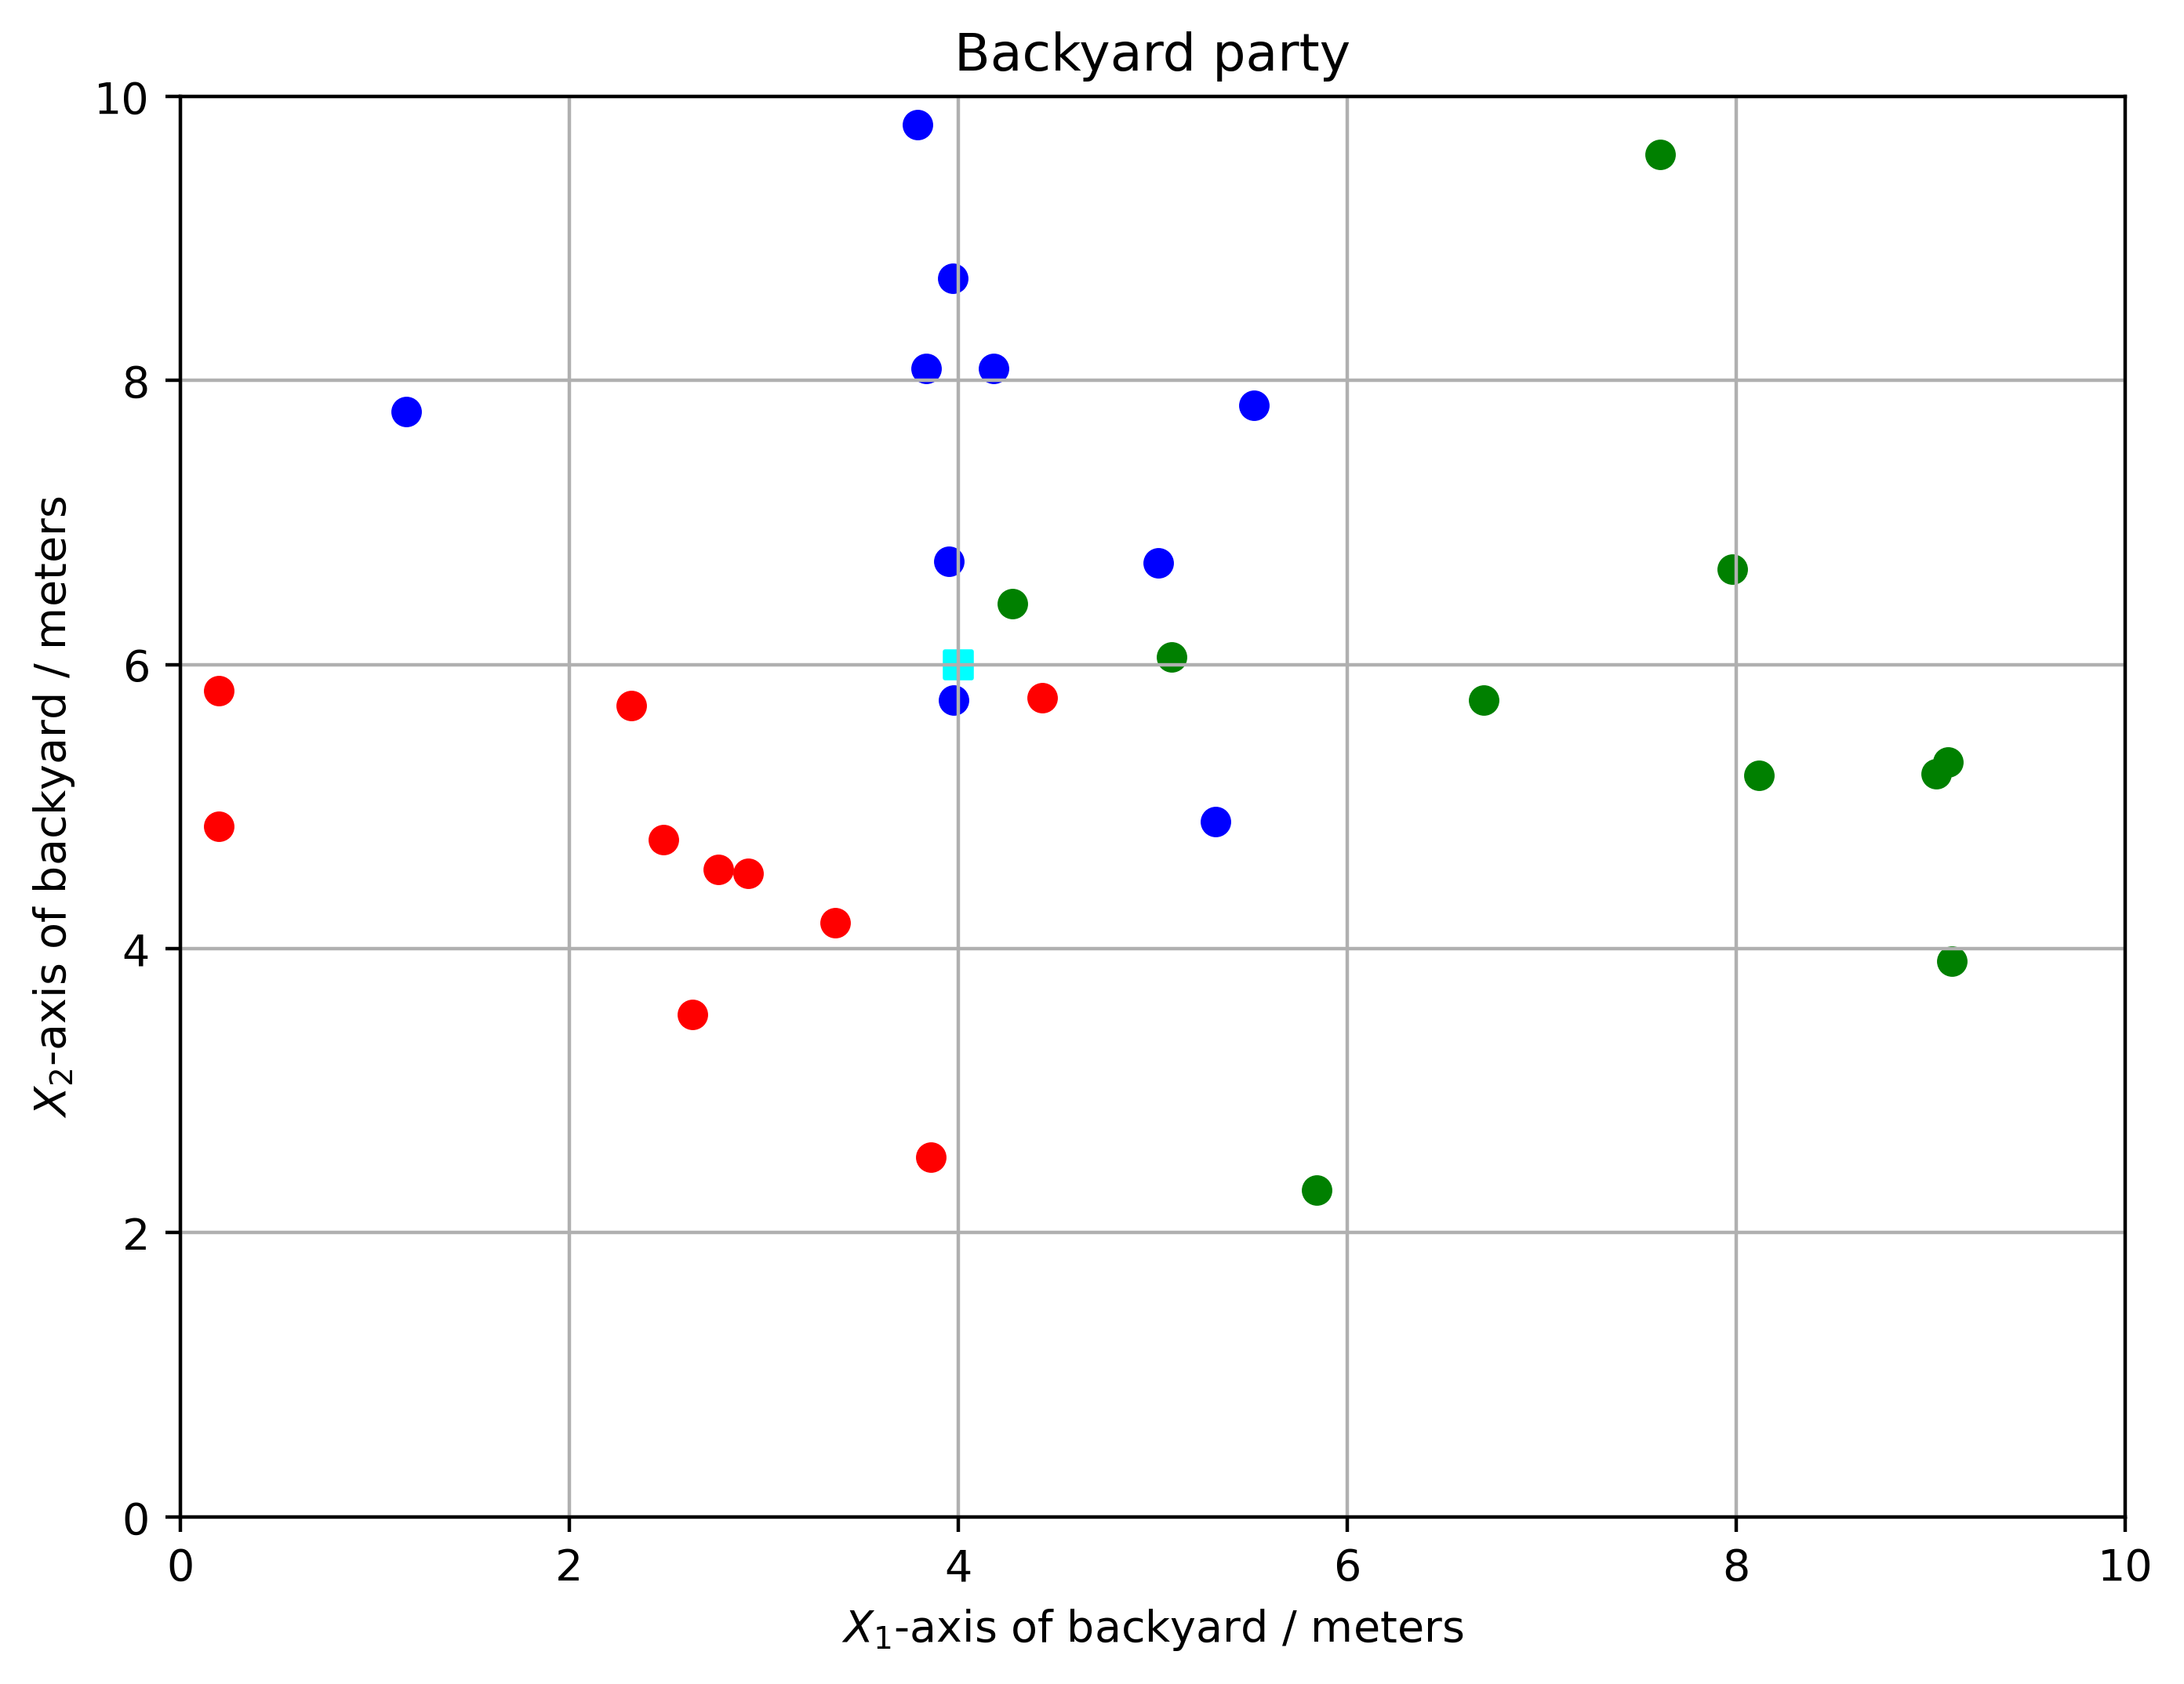

In [9]:
backyard_limits = [0.2,9.8] # set the limits of the backyard in meters

num_people = 10 # number of people per each friend group (known data)

# this is generating random data for the 3 friend groups
green_center = (7,6) # this is the center of the friend group
green_scale = 2 # this is how spread out the friend group is
coords_g = np.random.normal(loc = green_center, scale = green_scale, size = (num_people,2)) # generate the x and y coordindates from a normal distribtion
coords_g = np.clip(coords_g,backyard_limits[0],backyard_limits[1]) # restrict the arrays to be within the backyard

red_center = (2,4)
red_scale = 1.5
coords_r = np.random.normal(loc = red_center, scale = red_scale, size = (num_people,2))
coords_r = np.clip(coords_r,backyard_limits[0],backyard_limits[1])

blue_center = (4,8)
blue_scale = 1.8
coords_b = np.random.normal(loc = blue_center, scale = blue_scale, size = (num_people,2))
coords_b = np.clip(coords_b,backyard_limits[0],backyard_limits[1])

# this is generating data for the unknown people to predict their friend group
# right now it is just one, but how can you add more?
# new_center = (6,4)
# new_scale = 1.8
coords_n = np.array([[4,6]])#np.random.normal(loc = new_center, scale = new_scale, size = (1,2))
# coords_n = np.clip(coords_n,backyard_limits[0],backyard_limits[1])

plt.figure(figsize=(8, 6),dpi = 400)  # Adjust figure size as needed

# Create the scatter plot with custom colors
plt.scatter(coords_g[:,0], coords_g[:,1], c='green')
plt.scatter(coords_r[:,0], coords_r[:,1], c='red')
plt.scatter(coords_b[:,0], coords_b[:,1], c='blue')
plt.scatter(coords_n[:,0], coords_n[:,1], c='cyan', marker = 's')

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()

In [10]:
# Calculate distances using for loop
distances_r = []
for point in coords_r:
    distance = np.sqrt(np.sum((coords_n - point) ** 2)) # euclidean metric
    distances_r.append([distance,'r']) # append the distance and the label

distances_g = []
for point in coords_g:
    distance = np.sqrt(np.sum((coords_n - point) ** 2))
    distances_g.append([distance,'g'])

distances_b = []
for point in coords_b:
    distance = np.sqrt(np.sum((coords_n - point) ** 2))
    distances_b.append([distance,'b'])

distances = np.concatenate([distances_r,distances_g,distances_b]) # combine all the distance arrays together

distances = sorted(distances, key = lambda x:x[0]) # sort the distances from shortest to longest

K = 5 # can change this to be the square root of the number of labelled data points
for idx,d in enumerate(distances):
    print(f'Friend group: {d[1]}, distance = {round(float(d[0]),2)} m')
    if idx + 1 == K: # print a line to show where we set K
        print('-------------------------------')

Friend group: b, distance = 0.25 m
Friend group: r, distance = 0.49 m
Friend group: g, distance = 0.51 m
Friend group: b, distance = 0.73 m
Friend group: g, distance = 1.1 m
-------------------------------
Friend group: b, distance = 1.25 m
Friend group: r, distance = 1.71 m
Friend group: b, distance = 1.73 m
Friend group: r, distance = 1.82 m
Friend group: r, distance = 1.9 m
Friend group: r, distance = 1.92 m
Friend group: r, distance = 1.95 m
Friend group: b, distance = 2.09 m
Friend group: b, distance = 2.09 m
Friend group: b, distance = 2.37 m
Friend group: g, distance = 2.71 m
Friend group: b, distance = 2.72 m
Friend group: r, distance = 2.81 m
Friend group: b, distance = 3.35 m
Friend group: r, distance = 3.47 m
Friend group: r, distance = 3.8 m
Friend group: b, distance = 3.81 m
Friend group: r, distance = 3.97 m
Friend group: g, distance = 4.04 m
Friend group: g, distance = 4.13 m
Friend group: g, distance = 4.19 m
Friend group: g, distance = 5.09 m
Friend group: g, distance 

# SECOND KNN EXAMPLE: TOWNS IN THE OTTAWA VALLEY

In [11]:
from sklearn.metrics.pairwise import haversine_distances # for metric

def haversine_distance(x,y): # function to calculate distances (AKA THE METRIC)
    """
    this function is from:
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html
    
    Calculates the distance between two points on a sphere using the Haversine formula.

    Args:
        x: long/lat of first point
        y: long/lat of second point

    Returns:
        The distance between the two points in kilometers.
    """

    bsas = x
    paris = y
    
    bsas_in_radians = [math.radians(_) for _ in bsas]
    paris_in_radians = [math.radians(_) for _ in paris]
    result = haversine_distances([bsas_in_radians, paris_in_radians])
    result = 6371 * result # multiply by Earth radius to get kilometers

    distance_km = result[0][1]

    return(distance_km)

In [12]:
filename = 'ottawa_valley_coordinates.txt'

city_data = pd.read_csv(filename, delimiter = ';') # get dataframe

# set up latitude and longitude as numpy arrays. we need to manually convert the datatypes to float
lat = city_data['latitude'].astype('float')
long = city_data['longitude'].astype('float')


# coordinates of calabogie, will predict the province of this
y = [45.306671,-76.714912]

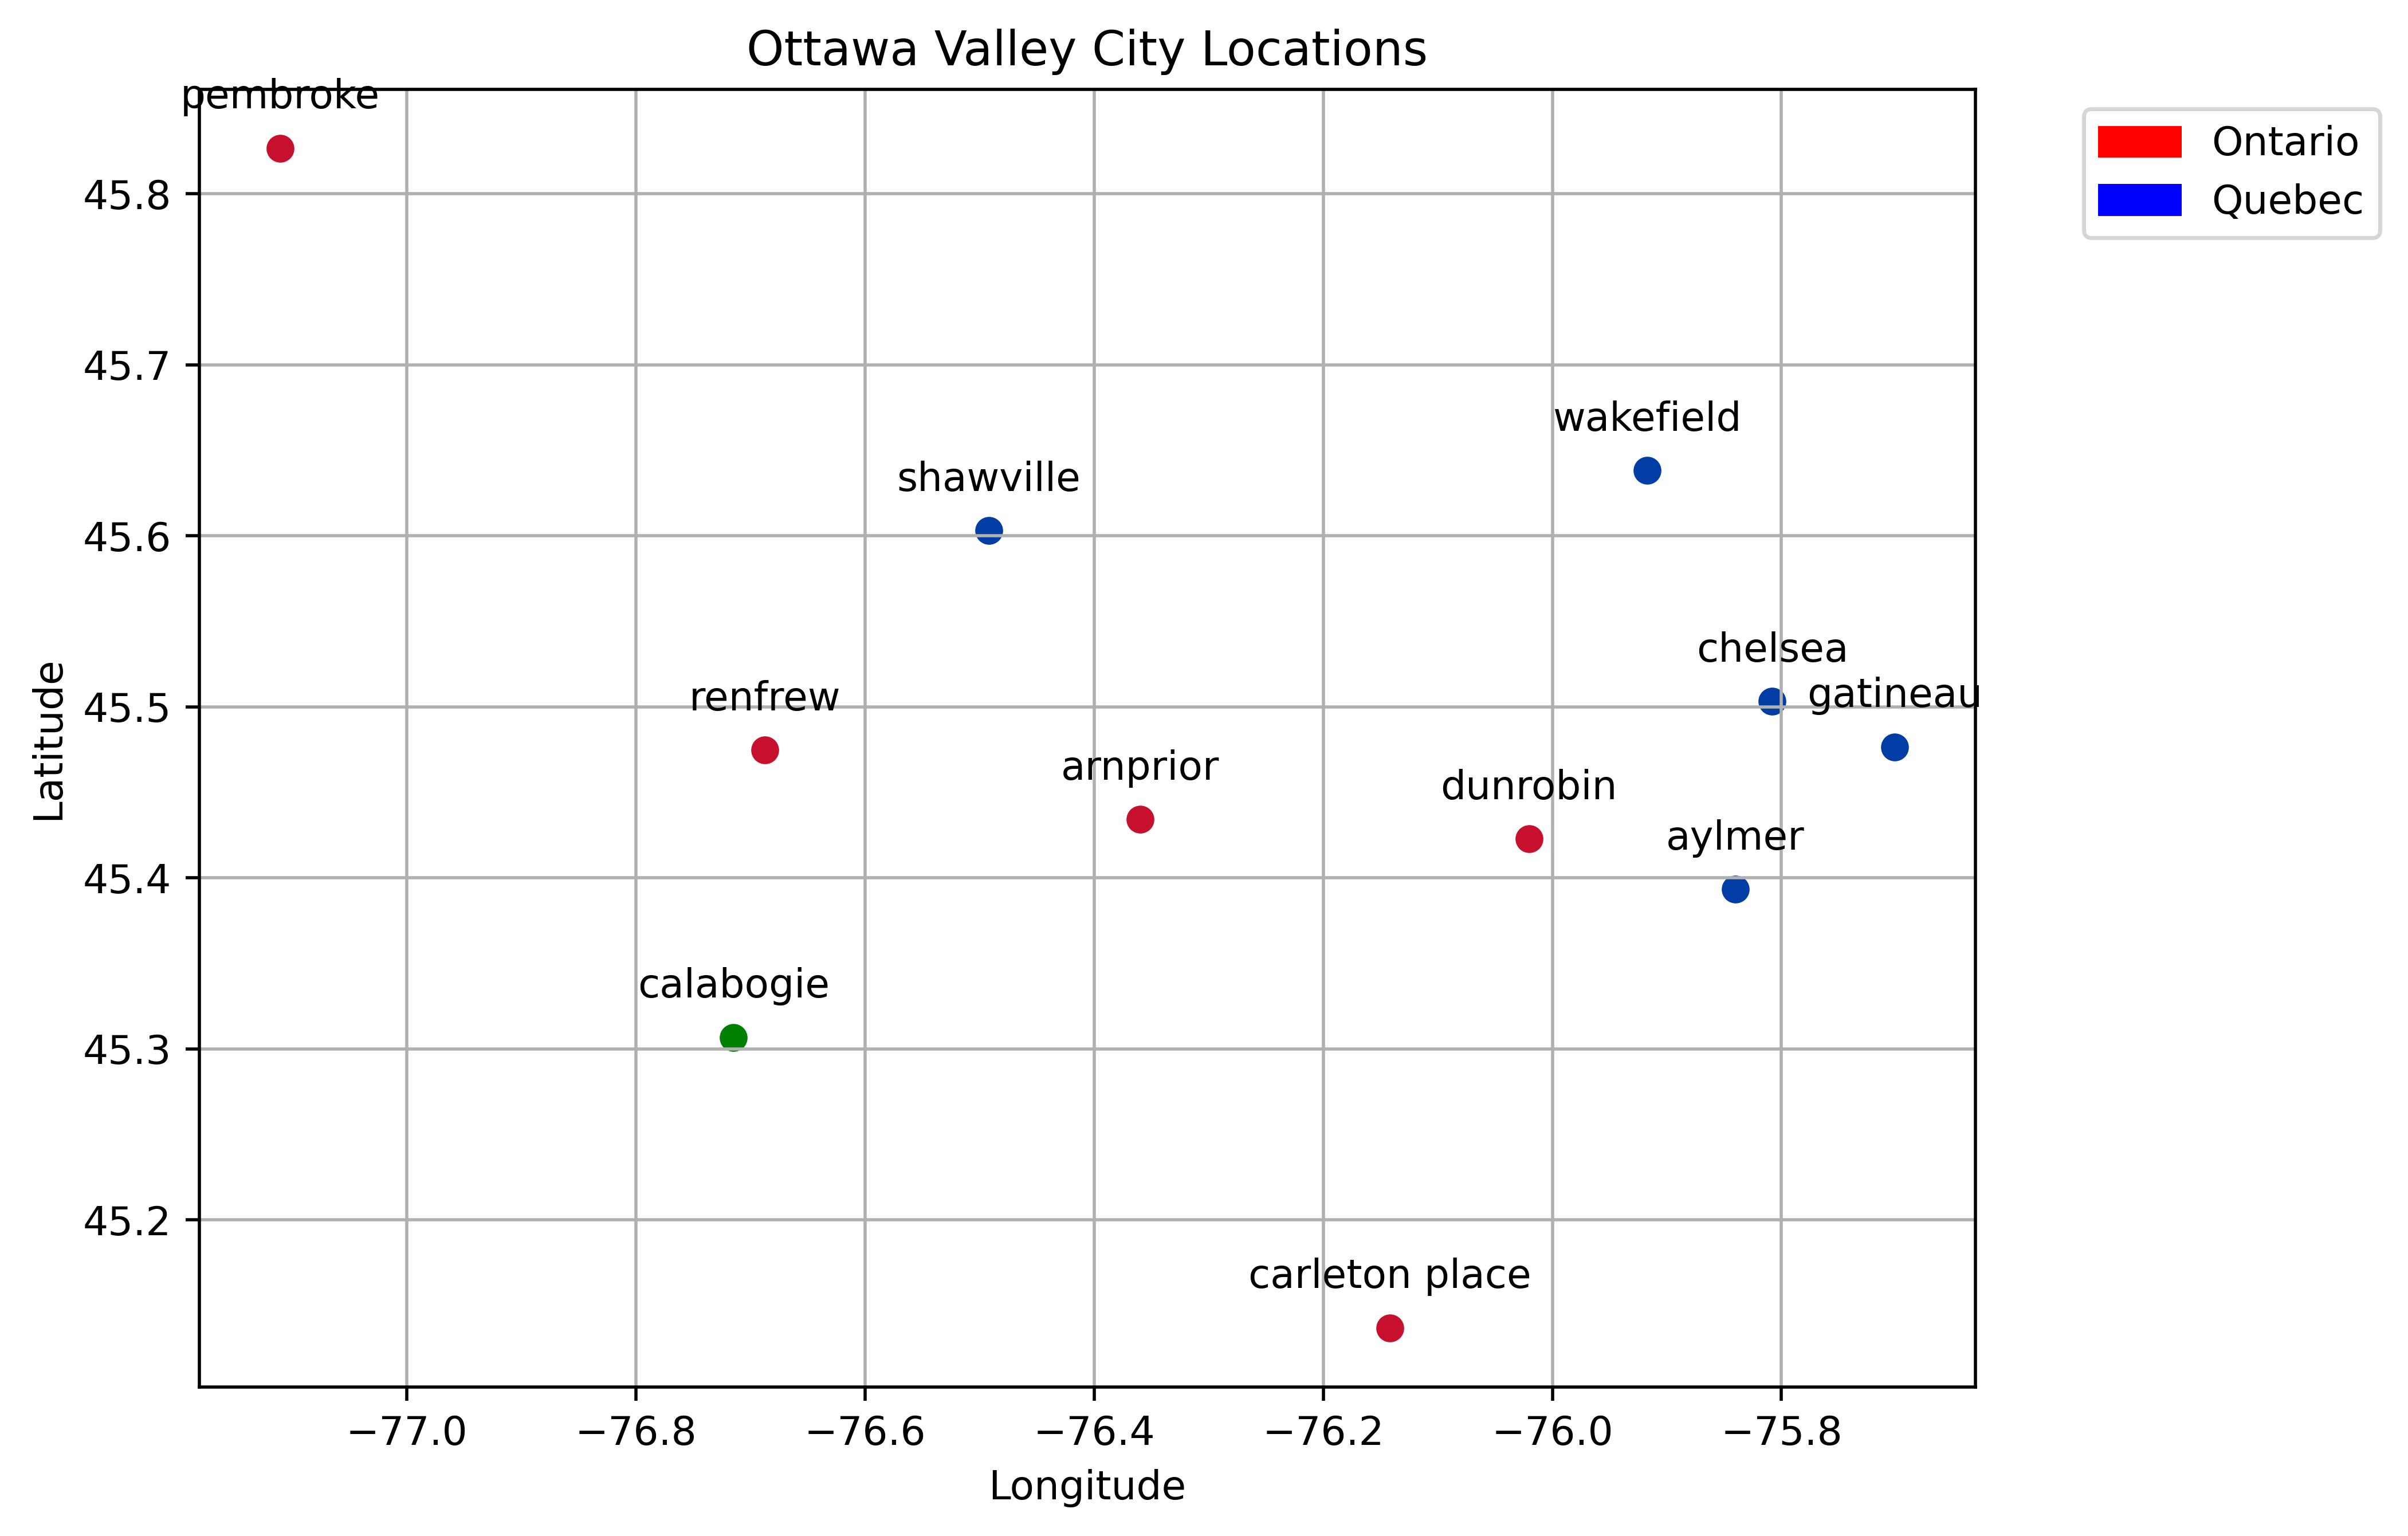

In [13]:
# Filter data by province (optional, can be done in plotting step)
ontario_data = city_data[city_data['province'] == 'ontario']
quebec_data = city_data[city_data['province'] == 'quebec']

# Create the plot
plt.figure(figsize=(8, 6),dpi = 500)  # Adjust figure size as needed

# rbg for ontario red and quebec blue, this is just extra could easily use 'r' and 'b'
ontario_rgb = [[200/256, 16/256, 46/256]]
quebec_rgb = [[0/256, 61/256, 165/256]]

for index, row in city_data.iterrows():
    plt.scatter(row['longitude'], row['latitude'], c=row['province'] == 'ontario' and ontario_rgb or quebec_rgb, marker='o', label=row['province'])
    plt.annotate(row['city'], (row['longitude'], row['latitude']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.scatter(y[1],y[0],label = 'Calabogie', c = 'green')
plt.annotate('calabogie', (y[1], y[0]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ottawa Valley City Locations')

# Add legend
# Define legend elements (adjust label and marker styles as needed)
ontario_patch = patches.Ellipse(xy=(1.1, 8), width=0.3, height=0.1, angle=0, color='red')
quebec_patch = patches.Rectangle(xy=(1.1, 7.5), width=0.3, height=0.1, color='blue')
plt.legend([ontario_patch, quebec_patch], ['Ontario', 'Quebec'], loc='upper left', bbox_to_anchor=(1.05, 1))  # Adjust location as needed


# Show the plot
plt.grid(True)
plt.show()

In [14]:
# now calculate and sort the distances

# empty list to store distances
distances = []

# THIS IS APPLYING THE METRIC
for idx,j in enumerate(lat):
    r = haversine_distance(x = [lat[idx],long[idx]],y = y) # calculate the distance between every known point and calabogie
    distances.append([r,city_data['province'][idx],city_data['city'][idx]]) # store this distance
    
distances = sorted(distances, key = lambda x:x[0]) # sort the distances from shortest to longest

K = 3
for idx,d in enumerate(distances):
    print(d)
    if idx + 1 == K: # print a line to show where we set K
        print('-------------------------------')

[18.81224219043152, 'ontario', 'renfrew']
[31.136971826767347, 'ontario', 'arnprior']
[37.26411327518843, 'quebec', 'shawville']
-------------------------------
[48.67438832431609, 'ontario', 'carleton place']
[55.774828860277566, 'ontario', 'dunrobin']
[65.52261952769112, 'ontario', 'pembroke']
[69.01569942639652, 'quebec', 'aylmer']
[72.3134333492153, 'quebec', 'wakefield']
[74.09446156329638, 'quebec', 'chelsea']
[81.37462988338682, 'quebec', 'gatineau']
